In [1]:
#You are working as a data scientist for a meteorological agency in Australia. 
#Your task is to help predict whether it will rain tomorrow in different cities across the country, 
#based on current weather data (e.g., temperature, humidity, wind).

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\weatherAUS.csv')
df.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No


In [7]:
df.shape

(259908, 24)

In [8]:
df.isnull().sum()

Date                  0
Location              0
MinTemp            4600
MaxTemp            4535
Rainfall           7959
Evaporation      148165
Sunshine         158684
WindGustDir       19240
WindGustSpeed     19046
WindDir9am        20258
WindDir3pm        11523
WindSpeed9am       5455
WindSpeed3pm       9877
Humidity9am        6068
Humidity3pm       10978
Pressure9am       28660
Pressure3pm       28638
Cloud9am         117766
Cloud3pm         123804
Temp9am            4592
Temp3pm            9614
RainToday          7959
RISK_MM            7959
RainTomorrow       7959
dtype: int64

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [10]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\choco\AppData\Local\Temp\ipykernel_4432\893124906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [12]:
value=df['RainTomorrow'].value_counts()
value

RainTomorrow
No     204353
Yes     55555
Name: count, dtype: int64

In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow             object
dtype: object

In [43]:
df['Day']=df['Date'].apply(lambda x:x.day)
#df['Day']=df['Day'].dt.day

In [44]:
df['Month']=df['Date'].apply(lambda x:x.month)
#df['Month']=df['Month'].dt.month

In [45]:
df['Year']=df['Date'].apply(lambda x:x.year)
#df['Year']=df['Date'].dt.year

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,8.0,7.0,16.9,21.8,No,0.0,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,7.0,7.0,17.2,24.3,No,0.0,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,7.0,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,7.0,7.0,18.1,26.5,No,1.0,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


In [47]:
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x:1 if x=='Yes' else 0)
#df['RainTomorrow']=df['RainTomorrow'].map({"Yes":1,"No":0})
df.head(2)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,1,13.4,22.9,0.6,4.0,0.0,1,44.0,1,...,8.0,7.0,16.9,21.8,1,0.0,0,1,12,2008
1,2008-12-02,1,7.4,25.1,0.0,4.0,0.0,2,44.0,2,...,7.0,7.0,17.2,24.3,1,0.0,0,2,12,2008


In [19]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow              int64
Day                       int64
Month                     int64
Year                      int64
dtype: object

In [46]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Location','WindGustDir', 'WindDir9am','WindDir3pm','RainToday' ])
df=encoder.fit_transform(df)
df.head()
#df=pd.get_dummies(df,columns=['Location','WindGustDir', 'WindDir9am','WindDir3pm','RainToday'])
#It creates boolean columns(One Hot Encoding) with the help of get_dummies


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,1,13.4,22.9,0.6,4.0,0.0,1,44.0,1,...,8.0,7.0,16.9,21.8,1,0.0,0,1,12,2008
1,2008-12-02,1,7.4,25.1,0.0,4.0,0.0,2,44.0,2,...,7.0,7.0,17.2,24.3,1,0.0,0,2,12,2008
2,2008-12-03,1,12.9,25.7,0.0,4.0,0.0,3,46.0,1,...,7.0,2.0,21.0,23.2,1,0.0,0,3,12,2008
3,2008-12-04,1,9.2,28.0,0.0,4.0,0.0,4,24.0,3,...,7.0,7.0,18.1,26.5,1,1.0,0,4,12,2008
4,2008-12-05,1,17.5,32.3,1.0,4.0,0.0,1,41.0,4,...,7.0,8.0,17.8,29.7,1,0.2,0,5,12,2008


In [21]:
x=df.drop(['RainTomorrow','Date'],axis=1)
y=df['RainTomorrow']
x.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Day,Month,Year
0,1,13.4,22.9,0.6,4.0,0.0,1,44.0,1,1,...,1007.1,8.0,7.0,16.9,21.8,1,0.0,1,12,2008
1,1,7.4,25.1,0.0,4.0,0.0,2,44.0,2,2,...,1007.8,7.0,7.0,17.2,24.3,1,0.0,2,12,2008


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((207926, 25), (51982, 25), (207926,), (51982,))

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\choco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 1, 0])

In [27]:
y_test[:5]

119911    0
10754     0
28704     0
9739      1
247855    0
Name: RainTomorrow, dtype: int64

In [28]:
model.score(x_test,y_test)

0.9709514832057251

In [29]:
model.score(x_train,y_train)

0.970912728566894

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9709514832057251

In [32]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[40070,   671],
       [  839, 10402]])

<Axes: >

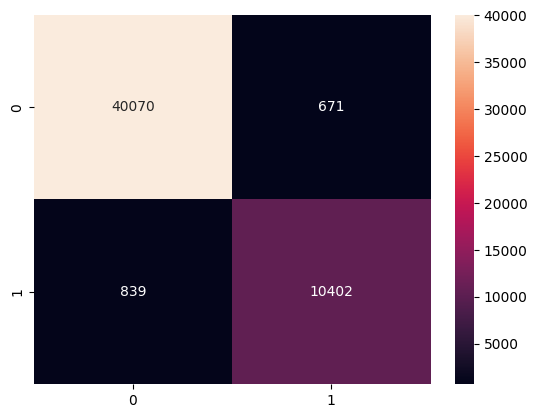

In [34]:
sns.heatmap(cm,annot=True,fmt='d')

In [35]:
y_prob=model.predict_proba(x_test)
y_prob[:5]

array([[9.99819546e-01, 1.80454340e-04],
       [9.99456300e-01, 5.43699703e-04],
       [9.99008232e-01, 9.91768070e-04],
       [5.88618304e-02, 9.41138170e-01],
       [9.99989843e-01, 1.01566976e-05]])

In [36]:
y_pred[:5]

array([0, 0, 0, 1, 0])

In [38]:
from sklearn.metrics import recall_score,precision_score,f1_score
precision_score(y_test,y_pred)

0.9394021493723471

In [39]:
recall_score(y_test,y_pred)

0.9253625122320078

In [40]:
f1_score(y_test,y_pred)

0.9323294792506946

In [41]:
model.coef_

array([[ 8.15505508e-02,  9.11461939e-02, -4.68625353e-02,
         6.60676927e-03, -1.10634122e-01, -6.71562321e-02,
        -1.64795052e-01,  2.21683743e-01,  7.60550510e-02,
        -2.92988561e-02, -7.79835992e-02, -2.47026349e-01,
        -4.94082339e-02,  7.44610410e-02,  1.33197806e-01,
        -1.48038412e-01,  1.28656442e-01,  2.42425874e-01,
        -8.82193950e-02,  1.00283151e-02,  7.45770184e-02,
         4.89268291e+00, -5.94635679e-03,  1.17477456e-01,
         7.03930539e-04]])

In [42]:
model.intercept_

array([0.00029174])